In [65]:
# Standard Imports
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize

import requests

import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
# Only required on the first run
nltk.download('vader_lexicon')
nltk.download('punkt', force=True)
nltk.download('punkt_tab')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Skoos\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Skoos\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Skoos\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [67]:
# Instantiate our analyzer
sid = SentimentIntensityAnalyzer()

In [68]:
sid.polarity_scores('Bork beep no boop bap :c ')

{'neg': 0.57, 'neu': 0.43, 'pos': 0.0, 'compound': -0.6486}

In [69]:
moby = requests.get('https://www.gutenberg.org/cache/epub/2701/pg2701.txt').text

In [70]:
len(moby)

1260540

In [71]:
len(sent_tokenize(moby))

9184

In [72]:
sentence_lev_sent =[]

for s in sent_tokenize(moby):
    sentence_lev_sent.append(sid.polarity_scores(s)['compound'])

In [73]:
sentence_lev_df = pd.DataFrame(
    {'Sentence': sent_tokenize(moby),
     'Sentiment': sentence_lev_sent}
)

sentence_lev_df['Sentiment_Smooth'] = sentence_lev_df['Sentiment'].rolling(10).mean()

sentence_lev_df.sample(5)

,Sentence,Sentiment,Sentiment_Smooth
1879,Nor was Bildad himself nor\r\nCaptain Peleg at...,0.0000,0.28635
5104,It was a black and hooded head; and hanging th...,0.5138,0.05574
1756,"“I mean,” he replied, “he must show his papers...",0.0000,0.04155
8634,"Dragged into Stubb’s boat with blood-shot, bli...",-0.7964,-0.30060
1435,“Clam or Cod?” she repeated.,0.0000,0.00520


<Axes: ylabel='Sentiment'>

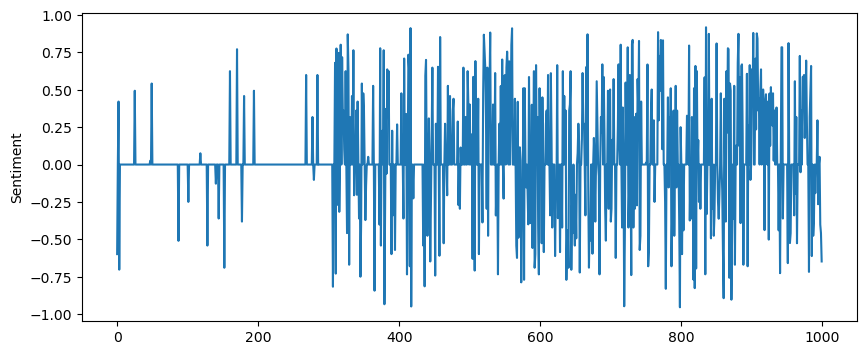

In [74]:
plt.figure(figsize=(10,4))
sns.lineplot(x=sentence_lev_df.index.tolist()[:1000], y='Sentiment', data=sentence_lev_df.iloc[:1000])

<Axes: ylabel='Sentiment_Smooth'>

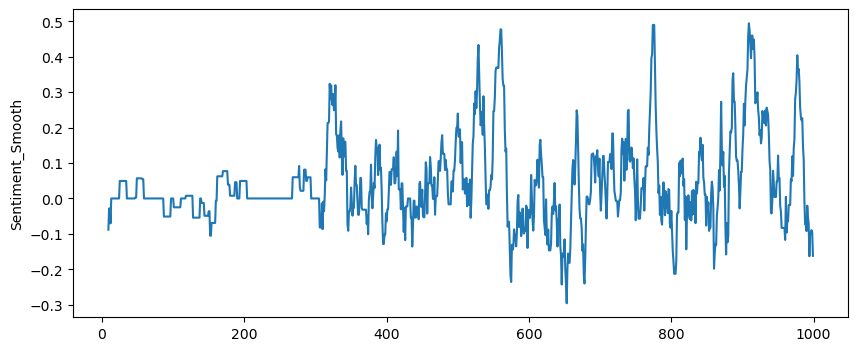

In [75]:
plt.figure(figsize=(10, 4))
sns.lineplot(x=sentence_lev_df.index.to_list()[:1000], y='Sentiment_Smooth', data=sentence_lev_df.iloc[:1000])

## Frankenstein 1831

In [76]:
frank31 = requests.get('https://www.gutenberg.org/cache/epub/84/pg84-images.html').text

In [77]:
len(frank31)

463878

In [78]:
len(sent_tokenize(frank31))

3193

In [79]:
sentence_lev_sent2 =[]

for s in sent_tokenize(frank31):
    sentence_lev_sent2.append(sid.polarity_scores(s)['compound'])

In [80]:
sentence_lev_df2 = pd.DataFrame(
    {'Sentence': sent_tokenize(frank31),
     'Sentiment': sentence_lev_sent2}
)

sentence_lev_df2['Sentiment_Smooth31'] = sentence_lev_df2['Sentiment'].rolling(10).mean()

sentence_lev_df2.sample(5)

,Sentence,Sentiment,Sentiment_Smooth31
2163,But the\r\nbeauty and regularity of the new to...,0.9817,-0.13348
2024,"My\r\npromise fulfilled, the monster would dep...",0.6249,0.28184
2949,</p>\r\n<p>\r\n“That he should live to be an i...,0.5994,-0.13374
2268,He said that he was wearing away his time frui...,0.6369,-0.00604
1155,Ah!,0.0000,0.04903


<Axes: ylabel='Sentiment_Smooth31'>

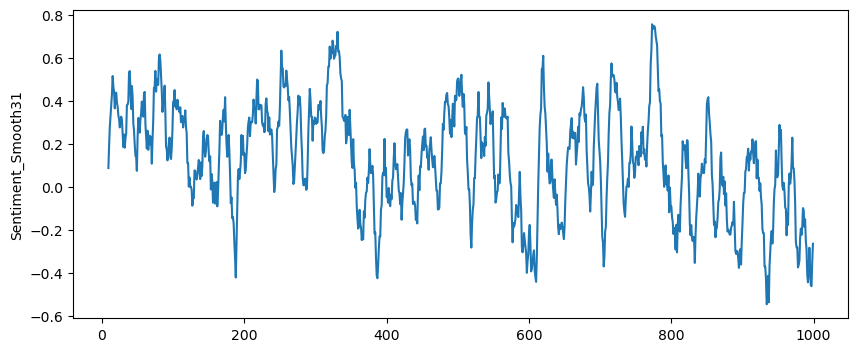

In [81]:
plt.figure(figsize=(10, 4))
sns.lineplot(x=sentence_lev_df2.index.to_list()[:1000], y='Sentiment_Smooth31', data=sentence_lev_df2.iloc[:1000])

## Frankenstein 1818

In [83]:
frank18 = requests.get('https://www.gutenberg.org/files/41445/41445-h/41445-h.htm').text

In [84]:
len(frank18)

430075

In [85]:
sentence_lev_sent3 =[]

for s in sent_tokenize(frank18):
    sentence_lev_sent3.append(sid.polarity_scores(s)['compound'])

In [87]:
sentence_lev_df3 = pd.DataFrame(
    {'Sentence': sent_tokenize(frank18),
     'Sentiment': sentence_lev_sent3}
)

sentence_lev_df3['Sentiment_Smooth18'] = sentence_lev_df3['Sentiment'].rolling(10).mean()

sentence_lev_df3.sample(5)

,Sentence,Sentiment,Sentiment_Smooth18
499,A servant in Geneva does not mean the same thi...,0.0000,0.26105
750,"Elizabeth saw even this last resource, her exc...",-0.9313,-0.44262
718,"If she is, as you\r\nbelieve, innocent, rely o...",0.4215,0.05306
2091,"âThis is the being whom I\r\naccuse, and for...",-0.6124,-0.34614
1377,"I am blind, and cannot judge of your countenan...",0.4019,0.14272


<Axes: ylabel='Sentiment_Smooth31'>

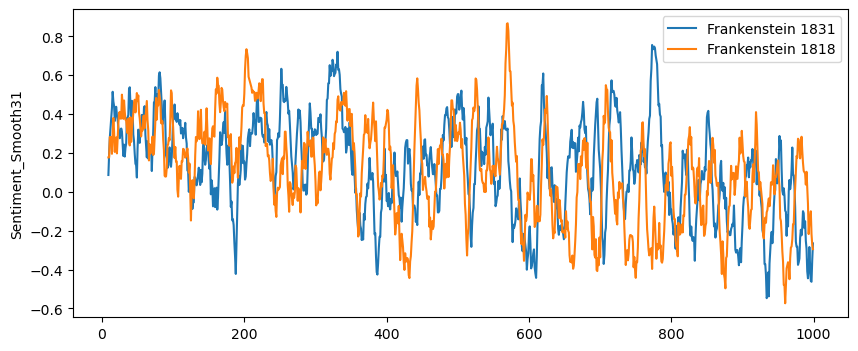

In [90]:
plt.figure(figsize=(10, 4))
sns.lineplot(x=sentence_lev_df2.index.to_list()[:1000], y='Sentiment_Smooth31', data=sentence_lev_df2.iloc[:1000], label = 'Frankenstein 1831')
sns.lineplot(x=sentence_lev_df2.index.to_list()[:1000], y='Sentiment_Smooth18', data=sentence_lev_df3.iloc[:1000], label = 'Frankenstein 1818')
